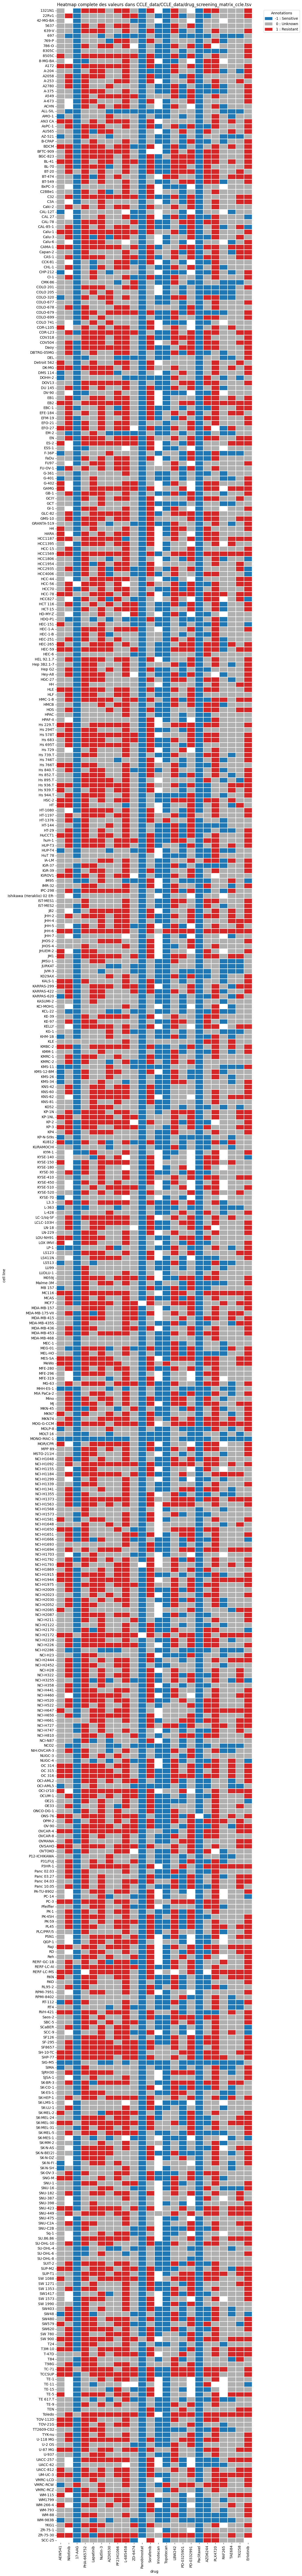

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_screening_heatmap(file_path, full_matrix=True):
    """
    Affiche une heatmap des valeurs -1, 0, 1 d'un fichier screening .tsv.

    Parameters:
    - file_path (str): Chemin vers le fichier .tsv
    - full_matrix (bool): True pour afficher toute la matrice, False pour un extrait 50x50
    """
    # Load the matrix
    df = pd.read_csv(file_path, sep='\t', index_col=0)

    # Keep only values: -1, 0 et 1
    df = df[df.isin([-1, 0, 1])]

    # full matrix or just an extract
    if not full_matrix:
        df = df.iloc[:100, :100]

    # colors : -1 → sensitive (blue), 0 → unknown (grey), 1 → resistant (red)
    cmap = {-1: "#1f77b4", 0: "#b0b0b0", 1: "#d62728"}
    color_df = df.replace(cmap)

    # dynamic size
    figsize = (max(12, df.shape[1] * 0.2), max(8, df.shape[0] * 0.2))
    plt.figure(figsize=figsize)

    # Heatmap
    sns.heatmap(df, cmap=sns.color_palette([cmap[-1], cmap[0], cmap[1]]), center=0, linewidths=0.1, cbar=False)

    # Title
    title_suffix = "complete" if full_matrix else "50x50"
    plt.title(f"Heatmap {title_suffix} des valeurs dans {file_path}")
    plt.xlabel("drug")
    plt.ylabel("cell line")

    # Legend
    legend_patches = [
        mpatches.Patch(color=cmap[-1], label="-1 : Sensitive"),
        mpatches.Patch(color=cmap[0], label=" 0 : Unknown"),
        mpatches.Patch(color=cmap[1], label=" 1 : Resistant")
    ]
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title="Annotations")

    plt.tight_layout()
    plt.show()

# Plot the desired heatmap
file_path = "CCLE_data/CCLE_data/drug_screening_matrix_ccle.tsv"  # screening file path
plot_screening_heatmap(file_path, full_matrix=True)  # False = 50x50 ; True = complete
